# Multilayer Perceptron (MLP)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('creditcard.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Hint: .get(a, b) is a method of a dictionary that returns the value for key a if it exists, otherwise it returns b. For example, d.get('a', 0) will return d['a'] if 'a' is in d, otherwise it will return 0.

Tokenize the sentences and compute the vocabulary of the exercise

Calculate priors

In [2]:
# TODO: Compute class priors P(AI) and P(psychology)
priors = {}
total_docs = len(y_train)
for value in y_train:
    label = value
    if label not in priors:
        priors[label] = 0
    priors[label] += 1

for label in priors:
    priors[label] /= total_docs

print('Class Priors:', priors)

Class Priors: {np.int64(0): 0.9982707542408216, np.int64(1): 0.001729245759178389}


Calculate the amount of words per class

## Sentiment Analysis with a Multilayer Perceptron (MLP) 

Our first neural network, how interesting!

### Theorical background

In this part, you will observe the implementation of a simple neural network (MLP) for binary sentiment classification. The task is to classify movie reviews as either **positive** or **negative**.

The steps include:

- **Data Preprocessing:** Convert text documents into numerical representations (e.g., Bag-of-Words or TF-IDF).
- **Model Building:** Create an MLP with one or more hidden layers using a deep learning framework .
- **Training:** Use a suitable loss function  and an optimizer .
- **Evaluation:** Assess the performance of your model on a validation or test set.

Go thrpugh the implementation and make sure you understand each step.

In [ ]:
# Sentiment Analysis with MLP

import numpy as np

def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a simple MLP
model = Sequential()

# NN layers
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2, verbose=1)
print(f"Training Loss: {history.history['loss'][-1]:.4f}", 
      f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss:.4f} - Accuracy: {accuracy:.4f}')

# predicted_label = 1 if prediction[0] > 0.5 else 0

# print(f"Text: {new_text}")
# print(f"Prediction (probability): {prediction[0][0]:.4f}")
# print(f"Predicted Sentiment: {'Positive' if predicted_label == 1 else 'Negative'}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9897 - loss: 0.1048 - val_accuracy: 0.9993 - val_loss: 0.0068
Epoch 2/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9993 - loss: 0.0111 - val_accuracy: 0.9992 - val_loss: 0.0200
Epoch 3/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.9992 - loss: 0.0083 - val_accuracy: 0.9993 - val_loss: 0.0073
Epoch 4/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9994 - loss: 0.0071 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 5/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9993 - loss: 0.0064 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 6/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9995 - loss: 0.0038 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 7/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.9992 - loss: 0.0050 - val_accuracy: 0.9994 - val_loss: 0.0052
Epoch 8/8
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9995 - loss: 0.0050 - 

' \npredicted_label = 1 if prediction[0] > 0.5 else 0\n\nprint(f"Text: {new_text}")\nprint(f"Prediction (probability): {prediction[0][0]:.4f}")\nprint(f"Predicted Sentiment: {\'Positive\' if predicted_label == 1 else \'Negative\'}") '

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Confusion Matrix:
[[56852    12]
 [   25    73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.74      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



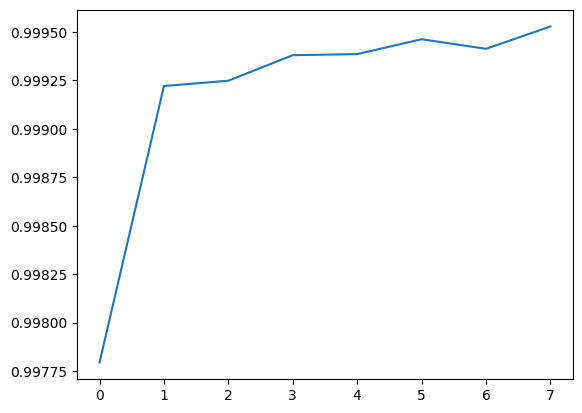

In [5]:
# Test the model and evaluate performance
y_pred = model.predict(X_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])